In [33]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [34]:
using JLD2, CairoMakie

In [35]:
cd("/home/sergey/work/repo/dynamical-systems/rate model/map LSE/")
len = 100
map_dim = " $(len)x$(len) "
name = " γY IE rate_model params from TG RK4"
format = ".jld2"
namefile_LSE = "LSE_100x100_γY_IE.jld2"
namefile_u0s = "u0s_100x100_γY_IE.jld2"

Λs = load(namefile_LSE)
Λs = Λs["λs"]
u0s = load(namefile_u0s)
init_points = u0s["init_points"]
last_points = u0s["last_points"]

γYrange = range( 0.0, 10.0, length = len );
IErange = range(0.0, 2.0, length = len);

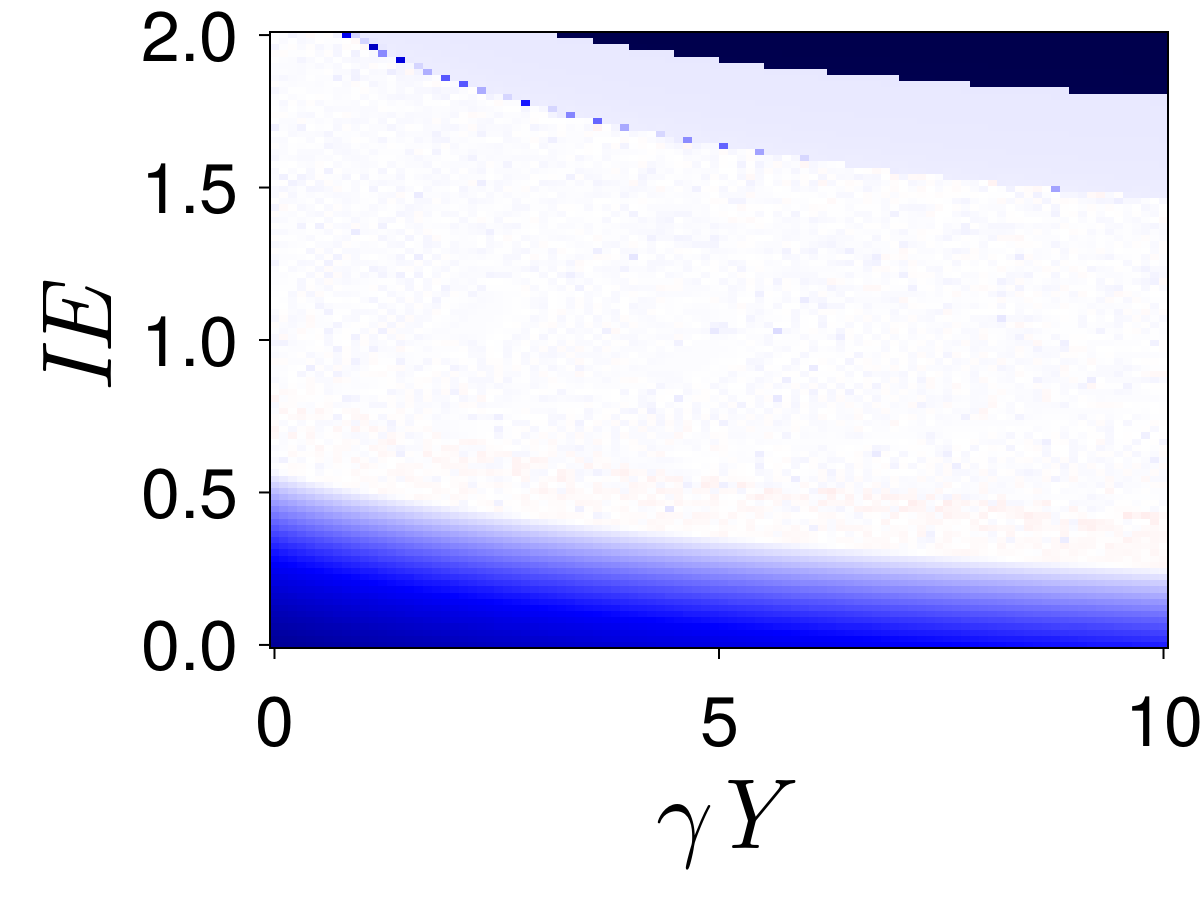

CairoMakie.Screen{IMAGE}


In [36]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

f = Figure()
ticksize = 35
tickpad = 10.0
textsize = 30
textsizecurve = 35
lw = 2.5
mksize = 12
colorhopf = :red
colorfold = :lime

ax = Axis(f[1, 1], xlabel = L"γY",ylabel = L"IE", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax, γYrange, IErange, Λs[:, :, index], colormap = :seismic, colorrange = (mn, mx))

display(f)